In [1]:
#goal..>predict the price of the second hand cars on the basis of the  condition 
#dependent variable..>

import pandas as pd
df=pd.read_csv(r"C:\Users\dell4\OneDrive\Desktop\Car.csv.xls")
df=df.iloc[:,1:]

print(df.isna().sum())
df=df.dropna()
print(df.isna().sum())
df=df.reset_index(drop=True)  #to reset the index of the dataset  
print(df)                     # the parameter of drop=True that the old index should be dropped and not include as a column in the dataframe


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           221
seats            221
dtype: int64
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64
                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     1200

In [2]:
#seats
print(df["seats"].value_counts())


seats
5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64


In [3]:
#torque
#unit...>newton meter

df=df.drop(columns="torque")
print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
7901             Hyundai i20 Magna  2013         320000     110000  Petrol   
7902         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
7903        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
7904               Tata Indigo CR4  2013         290000      25000  Diesel   
7905               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

# max_power


In [5]:
#max power ...>remove bhp 
def fxn(x):
    return x.split()[0]
df['max_power']=df['max_power'].apply(fxn)
print(df['max_power'])

#df['max_power']=df['max_power'].astype("float32")
#print(df['max_power'])
p=[]
for i in range (len(df)):
    try:
        float(df.iloc[i,-2])
    except:
        p.append(i)
print(p)
print(df.iloc[840])     
df=df.drop(index=p)
df=df.reset_index(drop=True)
print(df)

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
7901     82.85
7902       110
7903      73.9
7904        70
7905        70
Name: max_power, Length: 7906, dtype: object
[840]
name             Hyundai EON Era
year                        2011
selling_price             160000
km_driven                  57000
fuel                      Petrol
seller_type           Individual
transmission              Manual
owner                First Owner
mileage                21.1 kmpl
engine                    814 CC
max_power                   .bhp
seats                        5.0
Name: 840, dtype: object
                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         22

In [6]:
df['max_power']=df['max_power'].astype("float32")
print(df['max_power'])
#plt.hist(df["max_power"])
#plt.show()
#plt.violinplot(df["max_power"],showmeans=True)
#plt.show()

0        74.000000
1       103.519997
2        78.000000
3        90.000000
4        88.199997
           ...    
7900     82.849998
7901    110.000000
7902     73.900002
7903     70.000000
7904     70.000000
Name: max_power, Length: 7905, dtype: float32


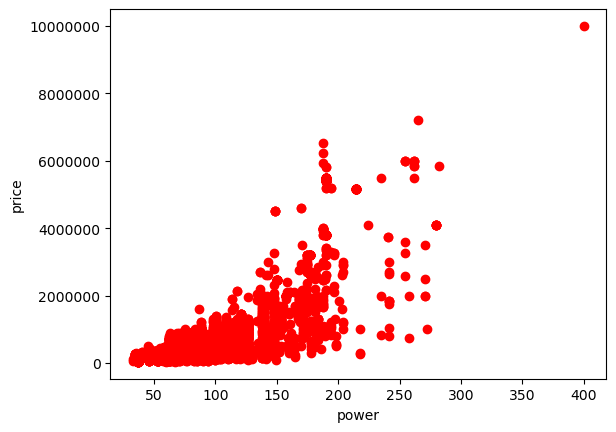

In [7]:
#to check the relation between max_power and selling price
import matplotlib.pyplot as plt
plt.scatter(df['max_power'],df['selling_price'],color="r")
plt.ticklabel_format(style="plain")
plt.xlabel('power')
plt.ylabel('price')
plt.show()


# engine

In [9]:
#engine
df['engine']=df['engine'].apply(lambda x:x.split()[0])
illegal=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-3])
    except:
        illegal.append(i)
df=df.drop(index=illegal).reset_index(drop=True)
df['engine']=df['engine'].astype("float32")
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine           float32
max_power        float32
seats            float64
dtype: object

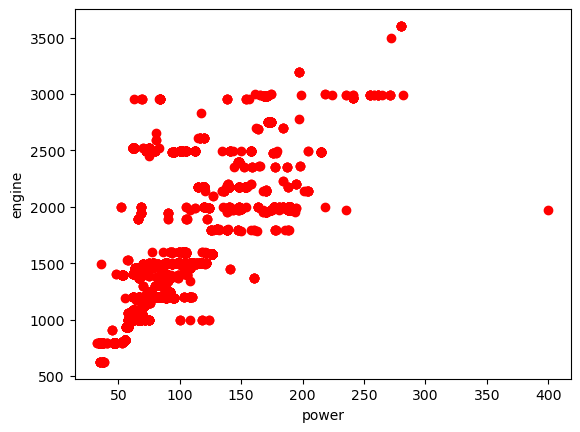

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['max_power'],df['engine'],color="r")
plt.ticklabel_format(style="plain")
plt.xlabel('power')
plt.ylabel('engine')
plt.show()

# mileage

In [12]:
def fxn(x):
    return x.split()[0]
df['mileage']=df['mileage'].apply(fxn)
print(df['mileage'])

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
7899     18.5
7900     16.8
7901     19.3
7902    23.57
7903    23.57
Name: mileage, Length: 7904, dtype: object


In [13]:
df['mileage']=df['mileage'].astype("float32")
print(df['mileage'])
p=[]
for i in range (len(df)):
    try:
        float(df.iloc[i,-4])
    except:
        p.append(i)
print(p)
df=df.drop(index=p)
df=df.reset_index(drop=True)
print(df)

0       23.400000
1       21.139999
2       17.700001
3       23.000000
4       16.100000
          ...    
7899    18.500000
7900    16.799999
7901    19.299999
7902    23.570000
7903    23.570000
Name: mileage, Length: 7904, dtype: float32
[]
                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
7899             Hyundai i20 Magna  2013         320000     110000  Petrol   
7900         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
7901        Maruti Swift Dzire ZDi  2009         3820

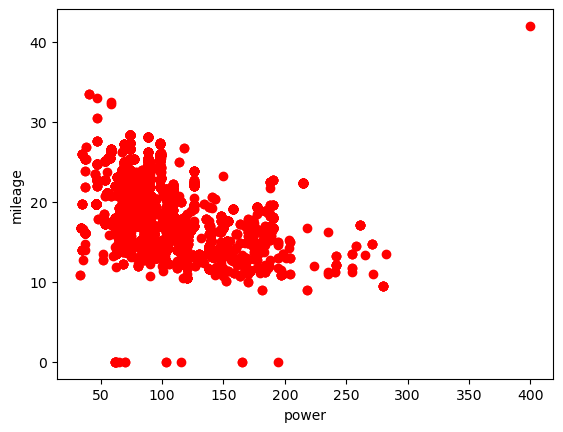

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['max_power'],df['mileage'],color="r")
plt.ticklabel_format(style="plain")
plt.xlabel('power')
plt.ylabel('mileage')
plt.show()

In [15]:
#owner
#print(df['owner'].values_counts())
#merge

df['owner']=df['owner'].replace({"Fifth":"Fourth & Above Owner"})
print(df['owner'].value_counts())

f=df["owner"].isin(["Test Drive Car"])
print(f)
i=df.index[f]
df=df.drop(i)
print(df["owner"].value_counts)
#label encoding ....>apply

owner
First Owner             5214
Second Owner            2015
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
7899    False
7900    False
7901    False
7902    False
7903    False
Name: owner, Length: 7904, dtype: bool
<bound method IndexOpsMixin.value_counts of 0                First Owner
1               Second Owner
2                Third Owner
3                First Owner
4                First Owner
                ...         
7899             First Owner
7900    Fourth & Above Owner
7901             First Owner
7902             First Owner
7903             First Owner
Name: owner, Length: 7899, dtype: object>


seller_type
Individual          6561
Dealer              1102
Trustmark Dealer     236
Name: count, dtype: int64


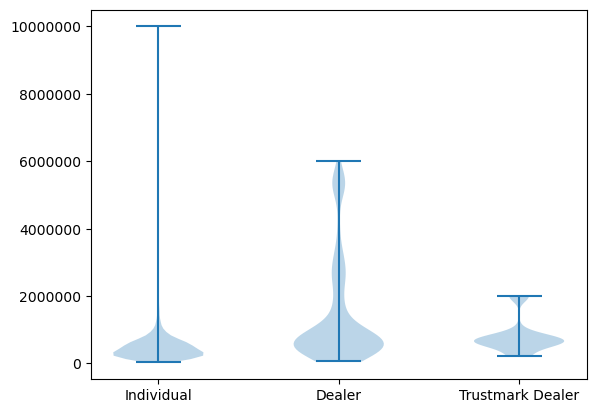

In [16]:
print(df["seller_type"].value_counts())
#individual ...>person is buying friend or personal relation
#local dealers
#trust mark dealer..>car dekho
#violin plot
f=df["seller_type"]=="Individual"
#f1=df["seller_type"]=="Dealer"
#f2=df["seller_type"]=="Trustmark Dealer"
#plt.violinplot(df.loc[df["seller_type"]=="Individual","selling_price"])
#plt.violinplot(df.loc[df["seller_type"]=="Dealer","selling_price"])
#plt.violinplot(df.loc[df["seller_type"]=="Trustmark Dealer","selling_price"])
plt.ticklabel_format(style="plain")
plt.violinplot([df.loc[df["seller_type"]=="Individual","selling_price"],df.loc[df["seller_type"] =="Dealer","selling_price"],df.loc[df["seller_type"]=="Trustmark Dealer","selling_price"]])

plt.xticks([1,2,3],["Individual","Dealer","Trustmark Dealer"])

plt.show()

<Axes: xlabel='selling_price', ylabel='seller_type'>

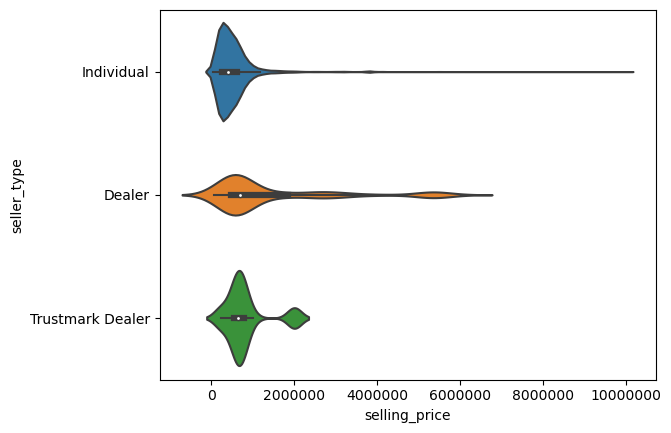

In [17]:
import seaborn
plt.ticklabel_format(style="plain")
seaborn.violinplot(data=df,x="selling_price",y="seller_type")


<Axes: xlabel='selling_price', ylabel='owner'>

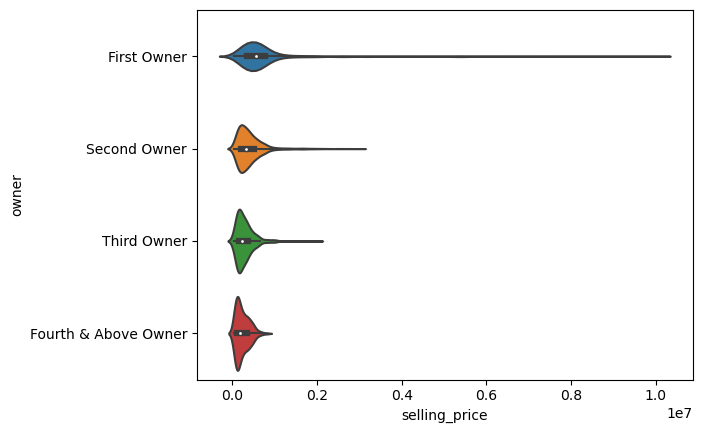

In [18]:
seaborn.violinplot(data=df,x="selling_price",y="owner")

In [19]:
print(df['fuel'].value_counts())

fuel
Diesel    4298
Petrol    3514
CNG         52
LPG         35
Name: count, dtype: int64


In [20]:
df['fuel']=df['fuel'].replace({'CNG':'Eco','LPG':'Eco'})
print(df['fuel'].value_counts())

fuel
Diesel    4298
Petrol    3514
Eco         87
Name: count, dtype: int64


<Axes: xlabel='selling_price', ylabel='fuel'>

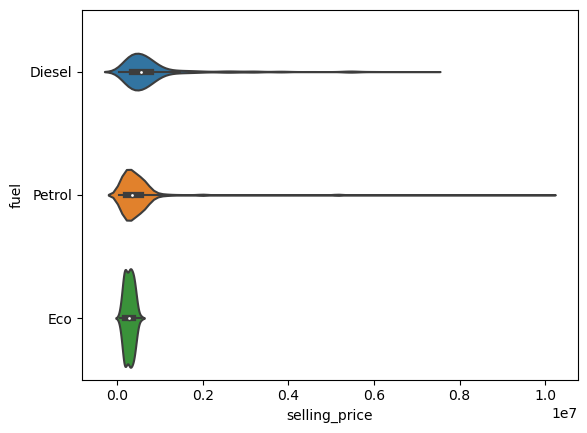

In [21]:
seaborn.violinplot(data=df,x="selling_price",y="fuel")

# km driven

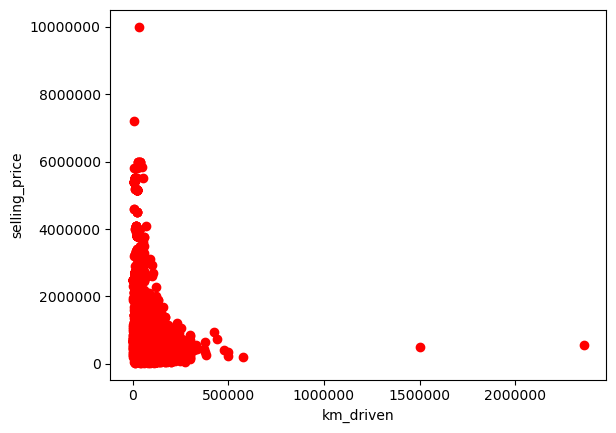

In [23]:
plt.ticklabel_format(style="plain")
plt.scatter(df['km_driven'],df['selling_price'],color="r")
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

In [24]:
#year...>same
#name...>one hot encoder..>huge categories thats why it not apply ..>sparsity (when we create too much dumy variables)
#print(df['name'].value_counts())
def abc(x):
    b=x.split()[0]
 
    return b
df['name']=df['name'].apply(abc)
#print(df['name'].value_counts())

#groupby...>avg selling price
pd.options.display.float_format="{:.2f}".format
g=df.groupby('name')
m=g['selling_price'].mean()
print(m)

x=m.sort_values(ascending=False)
print(x)

name
Ambassador       124000.00
Ashok            300000.00
Audi            2319432.35
BMW             4153813.56
Chevrolet        273867.48
Daewoo            77000.00
Datsun           314599.95
Fiat             317195.07
Force            887500.00
Ford             520873.67
Honda            593903.51
Hyundai          473511.00
Isuzu           1942000.00
Jaguar          2915464.79
Jeep            2149612.87
Kia             1504500.00
Land            3608333.33
Lexus           5150000.00
MG              1783333.33
Mahindra         630021.07
Maruti           409091.03
Mercedes-Benz   2470444.44
Mitsubishi       817500.00
Nissan           465407.36
Opel              68000.00
Renault          462618.38
Skoda            609721.12
Tata             361853.83
Toyota          1011920.31
Volkswagen       485217.38
Volvo           3272014.93
Name: selling_price, dtype: float64
name
Lexus           5150000.00
BMW             4153813.56
Land            3608333.33
Volvo           3272014.93
Jaguar   

In [25]:
def xyz(y):
    if y in x.index[:10]:
        return 2  #highend cars
    elif y in x.index[10:24]:
        return 1
    else:
        return 0
df['name']=df['name'].apply(xyz)
print(df['name'].value_counts())

name
1    7128
2     426
0     345
Name: count, dtype: int64


In [26]:
#stalistical analysis
#feature selection...> we are selecting importment features from the dataset 
#outlier detection...> we are removing those data which are out of the particular pattern of data 

In [27]:
#segrication
#numerical column and category 

numerical=df[["selling_price","year","km_driven","max_power","engine","mileage"]]
category=df[["name","fuel","seller_type","transmission","seats","owner"]]

In [28]:
category["fuel"]=category["fuel"].replace({"Petrol":0,"Diesel":1,"Eco":2})
category['seller_type']=category["seller_type"].replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
category["transmission"]=category["transmission"].replace({"Manual":0,"Automatic":1})
category["owner"]=category["owner"].replace({"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3})

C:\Users\dell4\AppData\Local\Temp\ipykernel_19760\3412994203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category["fuel"]=category["fuel"].replace({"Petrol":0,"Diesel":1,"Eco":2})
C:\Users\dell4\AppData\Local\Temp\ipykernel_19760\3412994203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['seller_type']=category["seller_type"].replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
C:\Users\dell4\AppData\Local\Temp\ipykernel_19760\3412994203.py:3: SettingWithCopyWarning: 
A value is tr

In [29]:
#pearson corelation test
#numeric  numeric
print(numerical.corr())
# +1...>positively corelated
# -1...>negatively corelated

               selling_price  year  km_driven  max_power  engine  mileage
selling_price           1.00  0.41      -0.22       0.75    0.46    -0.12
year                    0.41  1.00      -0.43       0.23    0.02     0.33
km_driven              -0.22 -0.43       1.00      -0.04    0.21    -0.17
max_power               0.75  0.23      -0.04       1.00    0.70    -0.37
engine                  0.46  0.02       0.21       0.70    1.00    -0.58
mileage                -0.12  0.33      -0.17      -0.37   -0.58     1.00


<Axes: >

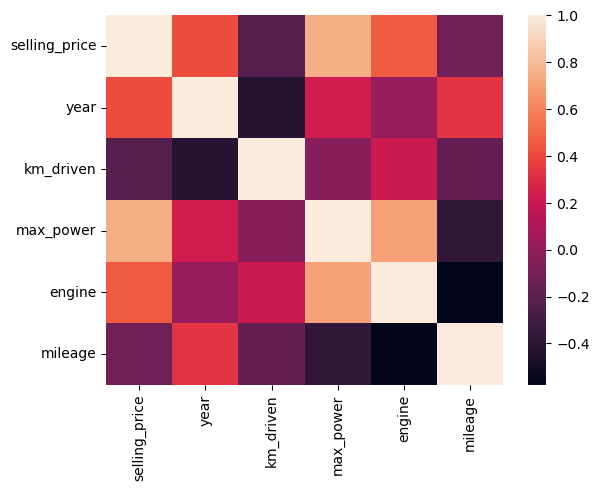

In [30]:
n=numerical.corr()
seaborn.heatmap(n)

# ANOVA TEST

In [32]:
#anova test
#analysis of variance 

#basic
#mean
#std deviation
#variance

#what is data distribution...>it is the pattern of probability of the elements in the data set 

#rolling 2 dicies


In [33]:
#Gaussian distribution properties

#Many ML algo are made by assuming that data is normally distributed
#most of the naturally occuring data belongs to the normal distibution 
#prediction and analytics can be easily done on normallly distributed data 
#because the mean=mode=median
#data is symmetrical 

In [34]:
#skewness...>a distribution of the symmetry that deviates from the symmetrical bell shape curve
#positively skewed..>mode<meadian<mean
#negatively skewed..>mean<median<mode
#skewness formula s=3(mean-median)/6
print(df["selling_price"].skew())
print(df["max_power"].skew())

4.153871318424948
1.6423762


In [35]:
#kurtosis
#it is used to find f score that is used to check if there is any relation between the category and the numerical column
#hypothesis testing
#null hypothesis(H0)..>variance of all the column is same
#alternative hypothesis (H1)...>variance of all the column is not same

In [36]:
#anova....>f score
#f score...>we decide whether we want to accept the null hypothesis or not
#  f=(ssb/DOFb)/(ssw/DOFW)
#ssw..>within the sum of squares
#ssw=(x-g)^2
#dof..>degree of freedom
#ssb..>beyween the sum of squares
# ssb=(X-Xg)^2

In [37]:
from sklearn.feature_selection import f_classif,SelectKBest
select=SelectKBest(f_classif,k=3)
columns=select.fit_transform(category,numerical["selling_price"])
print(columns)
selected=select.get_support(indices=True)
print(selected)
print(category.columns)
print(select.scores_)
#f..>classify..>performing anova test...>calculating the f score
#selectkBest..>finding out the top 3 columns with best f score
#if the f score value is greater than critical value then reject the null hypothesis 
#if the f score value is smaller than critical value then accept the null hypothesis

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[0 2 3]
Index(['name', 'fuel', 'seller_type', 'transmission', 'seats', 'owner'], dtype='object')
[11.6314993   3.11258891  6.7549591  12.03276301  2.66180735  3.72507073]


In [38]:
#outlier detection
#what is outlier
#data points ..>are out of pattern from the whole data
#why are we removing outliers?
#ml...>r2 score ..>remove the outlier
#case1 ..>when the data is normally distributed
#case2..> when the data is pure random (unknown distribution)

#case1..>normally distributed...>
#z score
#for example ..>data ...>mean =2 std dev=10
# -2 10 +2...>
#intege    between  8  and  12  fall under  first  std dev
#integers  between  6  and  14  fall under  second std dev
# integers between  4  and  16  fall under  third  std dev

#acc. to gaussian
#data 68%...>falls under first std dev 
# 95% falls under second std dev
#99.7% falls under 

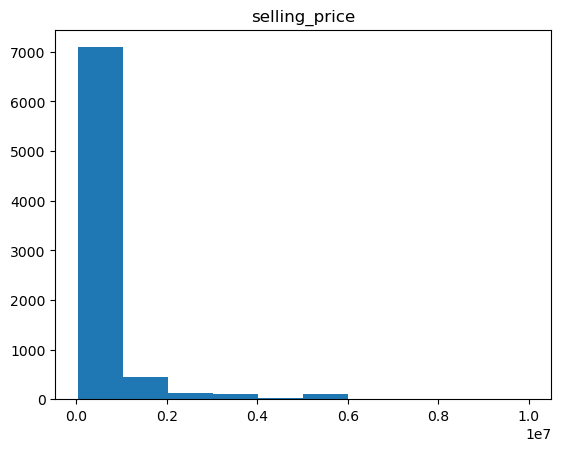

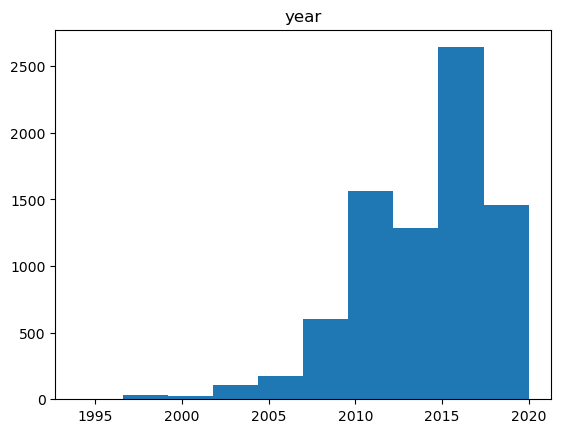

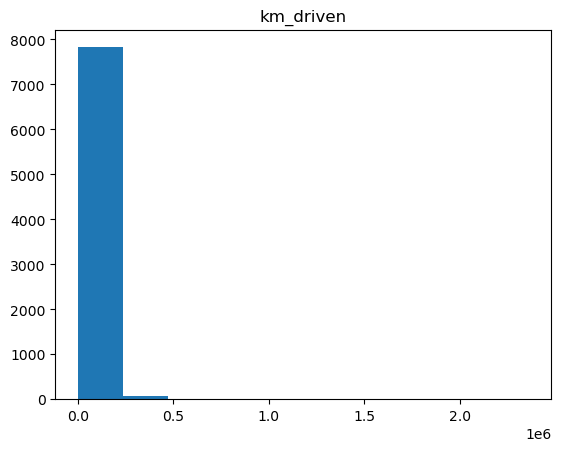

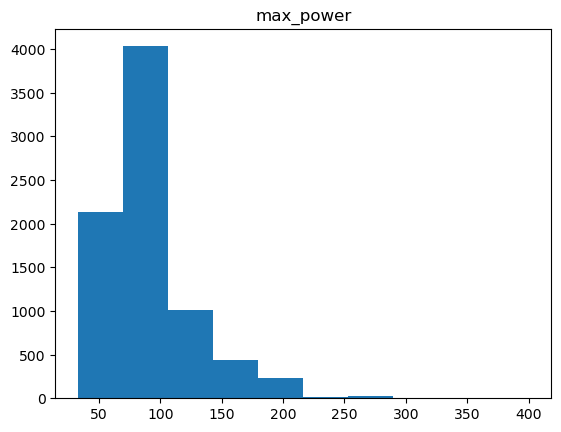

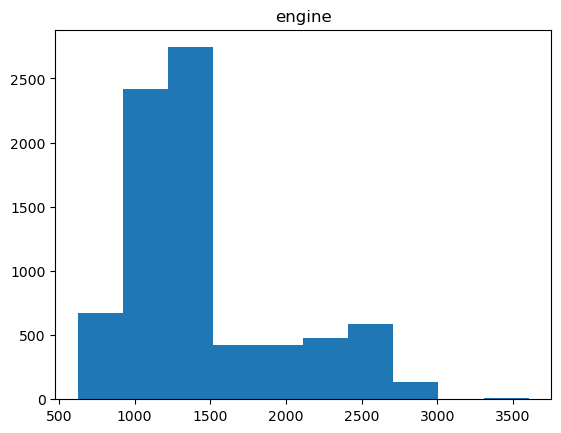

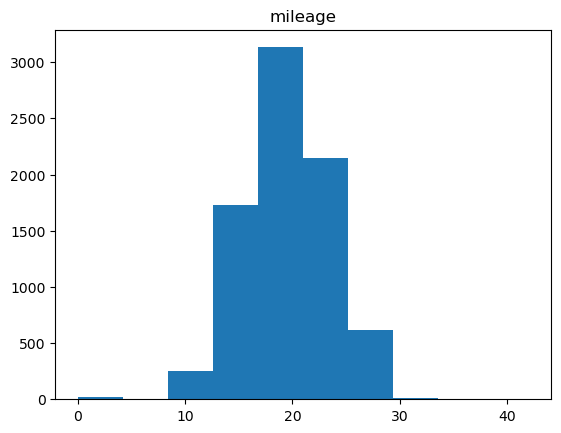

In [39]:
for column in numerical.columns:
    plt.hist(numerical[column])
    plt.title(column)
    plt.show()

In [40]:
#when data normal distribution
#mileage
print(df["mileage"].std())
print(df["mileage"].mean())
# -4 19 +4
#mileage...>40

4.036935329437256
19.421303


In [41]:
#z score...>returns the std dev of each data point wrt mean
#z score less than  -3 greater than +3 ...>outlier
#z_score =(x-mean)/std
#km_driven
import numpy as np
column=np.array([4,6,7,8,2])
z_score=np.array([-2,4,2,-4])

In [42]:
df1=df['km_driven']
print(df1)

0       145500
1       120000
2       140000
3       127000
4       120000
         ...  
7899    110000
7900    119000
7901    120000
7902     25000
7903     25000
Name: km_driven, Length: 7899, dtype: int64


In [43]:
dfm=numerical['km_driven'].mean()
dfs=numerical['km_driven'].std()
for x in numerical ['km_driven']:
    z_score=(x-dfm)/dfs
   # print(z_score)
    if z_score>3 or z_score<-3:
        print(x)

240000
265000
250000
300000
300000
334000
1500000
300000
375000
300000
255000
380000
270000
300000
248000
260000
240000
300000
300000
260000
2360457
577414
250000
250000
500000
330000
291000
250000
265000
246000
240000
305000
264000
298000
270000
291977
248200
242000
300000
240000
290000
270000
475000
440000
285000
250000
239451
426000
250000
330000
370000
320000
250000
250000
500000
250000
250000
271000
260000
248119
376412
250000
280000
250000
265000
250000
250000
250000
300000
250000


# case2

In [45]:
#when data belongs to pure random (unknown)...>engine
#algo....>DBSCAN...>density based spatial clustring of application with noise
#data....>groups the data 
#DBSCAN..>segment..>we can also detect outliers

In [46]:
#epsilon...>radius of the data point 
#min_samples...>min data points required for making a dense region

#there aree three types pf points in the DBSCAN 
#core point ..>it contains atleast the number of min_samples
#border points ...>contain point less than the min samples
#noise points..> contains no extra data in its radius 

In [47]:
#engine DBSCAN 
data=numerical[['engine','selling_price']]
#scale..>distance related algo..>MinMaxScaling
#0-1
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
data=mn.fit_transform(data)
print(data)

[[0.20939597 0.04212648]
 [0.29328859 0.0341024 ]
 [0.29295302 0.01283861]
 ...
 [0.20939597 0.03530601]
 [0.2590604  0.02607833]
 [0.2590604  0.02607833]]


In [48]:
import numpy as np
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.06,min_samples=10)
dbscan.fit(data)
labels=dbscan.labels_
print(labels)
print(np.unique(labels))
print(np.unique(labels,return_counts=True))

[0 0 0 ... 0 0 0]
[-1  0  1  2  3  4  5]
(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64), array([  15, 6205, 1555,   34,   10,   68,   12], dtype=int64))


In [49]:
#samples whose circle contains similar number of points are lablled as one category
#those samples whose circles dose not have any data are lablled as -1 (outliers)

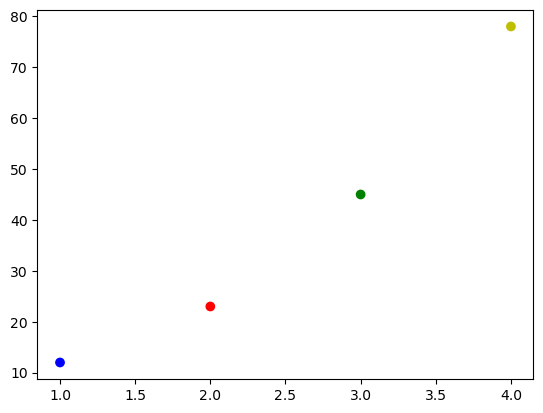

In [50]:
l1=[2,3,4,1]
l2=[23,45,78,12]
color=('r','g','y','b')
plt.scatter(l1,l2,c=color)
plt.show()

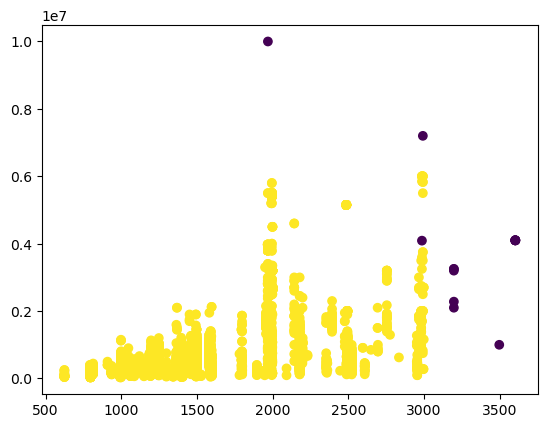

In [51]:
l=np.where(labels>-1,0,-1)
plt.scatter(df['engine'],df['selling_price'],c=l)
plt.show()
#visullay see the data points which are outliers 

[0.        0.0002006 0.0002006 ... 0.0002006 0.        0.       ]


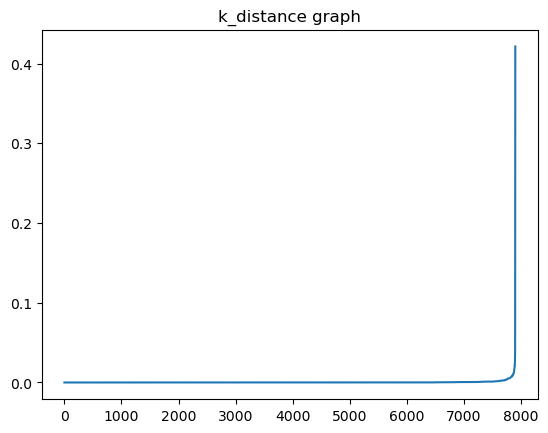

In [52]:
#how to decide the value of epsilon and min_samples
#K-distance graph
#epsilon value is described based on the average distance of each data point to its nearest neighbour
#making a K distance graph
#scale the data
#find the nearest neighbour of each data point

from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=10)
nn.fit(data)
distance,index=nn.kneighbors(data)
#print(distance)
distance=distance[:,1]
print(distance)
distance=np.sort(distance,axis=0)
plt.plot(distance)
plt.title('k_distance graph')
plt.show()

In [53]:
#remove outliers from the numerical ['engine']
#f=labels!=-1
#print(f)
#numerical=numerical[f]
numerical=numerical.reset_index(drop=True)
print(numerical)

      selling_price  year  km_driven  max_power  engine  mileage
0            450000  2014     145500      74.00 1248.00    23.40
1            370000  2014     120000     103.52 1498.00    21.14
2            158000  2006     140000      78.00 1497.00    17.70
3            225000  2010     127000      90.00 1396.00    23.00
4            130000  2007     120000      88.20 1298.00    16.10
...             ...   ...        ...        ...     ...      ...
7894         320000  2013     110000      82.85 1197.00    18.50
7895         135000  2007     119000     110.00 1493.00    16.80
7896         382000  2009     120000      73.90 1248.00    19.30
7897         290000  2013      25000      70.00 1396.00    23.57
7898         290000  2013      25000      70.00 1396.00    23.57

[7899 rows x 6 columns]


In [54]:
#remove outliers from the numerical ['engine']
f=labels!=-1
print(f)
numerical=numerical[f]
numerical=numerical.reset_index(drop=True)
print(numerical)

[ True  True  True ...  True  True  True]
      selling_price  year  km_driven  max_power  engine  mileage
0            450000  2014     145500      74.00 1248.00    23.40
1            370000  2014     120000     103.52 1498.00    21.14
2            158000  2006     140000      78.00 1497.00    17.70
3            225000  2010     127000      90.00 1396.00    23.00
4            130000  2007     120000      88.20 1298.00    16.10
...             ...   ...        ...        ...     ...      ...
7879         320000  2013     110000      82.85 1197.00    18.50
7880         135000  2007     119000     110.00 1493.00    16.80
7881         382000  2009     120000      73.90 1248.00    19.30
7882         290000  2013      25000      70.00 1396.00    23.57
7883         290000  2013      25000      70.00 1396.00    23.57

[7884 rows x 6 columns]


In [55]:
print(category)

      name  fuel  seller_type  transmission  seats  owner
0        1     1            0             0   5.00      0
1        1     1            0             0   5.00      1
2        1     0            0             0   5.00      2
3        1     1            0             0   5.00      0
4        1     0            0             0   5.00      0
...    ...   ...          ...           ...    ...    ...
7899     1     0            0             0   5.00      0
7900     1     1            0             0   5.00      3
7901     1     1            0             0   5.00      0
7902     1     1            0             0   5.00      0
7903     1     1            0             0   5.00      0

[7899 rows x 6 columns]


In [56]:
#remove outliers from the numerical ['engine']
f=labels!=-1
#print(f)
category=category[f]
category=category.reset_index(drop=True)
print(category)

      name  fuel  seller_type  transmission  seats  owner
0        1     1            0             0   5.00      0
1        1     1            0             0   5.00      1
2        1     0            0             0   5.00      2
3        1     1            0             0   5.00      0
4        1     0            0             0   5.00      0
...    ...   ...          ...           ...    ...    ...
7879     1     0            0             0   5.00      0
7880     1     1            0             0   5.00      3
7881     1     1            0             0   5.00      0
7882     1     1            0             0   5.00      0
7883     1     1            0             0   5.00      0

[7884 rows x 6 columns]


In [57]:
def detect_outlier(column):
     std=column.std()
     mean=column.mean()
     z_score=(column-mean)/std
     return column [(z_score>3) | (z_score<-3)]
out=detect_outlier(numerical["km_driven"])
f=numerical["km_driven"].isin(out)
numerical=numerical[~f]

   
out1=detect_outlier(numerical["mileage"])
f=numerical["mileage"].isin(out1)
numerical=numerical[~f]


out2=detect_outlier(numerical["max_power"])
f=numerical["max_power"].isin(out2)
numerical=numerical[~f]


#print(out2)
#print(numerical["km_driven"])
print(numerical)

      selling_price  year  km_driven  max_power  engine  mileage
0            450000  2014     145500      74.00 1248.00    23.40
1            370000  2014     120000     103.52 1498.00    21.14
2            158000  2006     140000      78.00 1497.00    17.70
3            225000  2010     127000      90.00 1396.00    23.00
4            130000  2007     120000      88.20 1298.00    16.10
...             ...   ...        ...        ...     ...      ...
7879         320000  2013     110000      82.85 1197.00    18.50
7880         135000  2007     119000     110.00 1493.00    16.80
7881         382000  2009     120000      73.90 1248.00    19.30
7882         290000  2013      25000      70.00 1396.00    23.57
7883         290000  2013      25000      70.00 1396.00    23.57

[7708 rows x 6 columns]


In [58]:
print(category)

      name  fuel  seller_type  transmission  seats  owner
0        1     1            0             0   5.00      0
1        1     1            0             0   5.00      1
2        1     0            0             0   5.00      2
3        1     1            0             0   5.00      0
4        1     0            0             0   5.00      0
...    ...   ...          ...           ...    ...    ...
7879     1     0            0             0   5.00      0
7880     1     1            0             0   5.00      3
7881     1     1            0             0   5.00      0
7882     1     1            0             0   5.00      0
7883     1     1            0             0   5.00      0

[7884 rows x 6 columns]


In [59]:
numerical=numerical.reset_index(drop=True)
category=category.reset_index(drop=True)

In [60]:
numerical

,selling_price,year,km_driven,max_power,engine,mileage
0,450000,2014,145500,74.00,1248.00,23.40
1,370000,2014,120000,103.52,1498.00,21.14
2,158000,2006,140000,78.00,1497.00,17.70
3,225000,2010,127000,90.00,1396.00,23.00
4,130000,2007,120000,88.20,1298.00,16.10
...,...,...,...,...,...,...
7703,320000,2013,110000,82.85,1197.00,18.50
7704,135000,2007,119000,110.00,1493.00,16.80
7705,382000,2009,120000,73.90,1248.00,19.30
7706,290000,2013,25000,70.00,1396.00,23.57


In [61]:
category

,name,fuel,seller_type,transmission,seats,owner
0,1,1,0,0,5.00,0
1,1,1,0,0,5.00,1
2,1,0,0,0,5.00,2
3,1,1,0,0,5.00,0
4,1,0,0,0,5.00,0
...,...,...,...,...,...,...
7879,1,0,0,0,5.00,0
7880,1,1,0,0,5.00,3
7881,1,1,0,0,5.00,0
7882,1,1,0,0,5.00,0


In [62]:
final_df=pd.concat((numerical,category),axis=1)
final_df

,selling_price,year,km_driven,max_power,engine,mileage,name,fuel,seller_type,transmission,seats,owner
0,450000.00,2014.00,145500.00,74.00,1248.00,23.40,1,1,0,0,5.00,0
1,370000.00,2014.00,120000.00,103.52,1498.00,21.14,1,1,0,0,5.00,1
2,158000.00,2006.00,140000.00,78.00,1497.00,17.70,1,0,0,0,5.00,2
3,225000.00,2010.00,127000.00,90.00,1396.00,23.00,1,1,0,0,5.00,0
4,130000.00,2007.00,120000.00,88.20,1298.00,16.10,1,0,0,0,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7879,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,5.00,0
7880,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,5.00,3
7881,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,5.00,0
7882,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,5.00,0


In [63]:
y=final_df['selling_price']
x=final_df.drop(columns="selling_price")

In [64]:
#encoding....
#fuel and seller type....>apply one hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("encode",OneHotEncoder (drop="first"),[7,8])],remainder="passthrough")
x=ct.fit_transform(x)
print(x)

[[0. 0. 0. ... 1. 5. 0.]
 [0. 0. 0. ... 1. 5. 1.]
 [0. 0. 0. ... 0. 5. 2.]
 ...
 [0. 0. 0. ... 1. 5. 0.]
 [0. 0. 0. ... 1. 5. 0.]
 [0. 0. 0. ... 1. 5. 0.]]
